|Name:|Tufan Kundu|
|-|-|
|Registration no:|24MDT0184|
|Course Name:|Deep Learning Lab|
|Course Code:|PMDS603P|
|Experiment:|6|
|Date:|28 August,2025|

## Load the Boston Housing dataset available in Keras. The dataset contains 13 numerical features about houses (crime rate, average rooms, property tax, etc.) and the target is the median house price in $1000s

In [1]:
from tensorflow import keras 
from keras.datasets import boston_housing 

(x_train,y_train),(x_test,y_test) = boston_housing.load_data()

57026/57026 ━━━━━━━━━━━━━━━━━━━━ 0s 3us/step


### Scaling the data

In [3]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [4]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.optimizers import SGD
from keras.callbacks import EarlyStopping

import warnings 
warnings.filterwarnings('ignore')

### building the model

In [29]:
model = Sequential()
model.add(Flatten(input_shape = (13,)))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(1, activation = 'linear'))

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ (None, 13)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,953 (23.25 KB)

 Trainable params: 5,953 (23.25 KB)

 Non-trainable params: 0 (0.00 B)

In [30]:
sgd = SGD(learning_rate=0.001, momentum = 0.9 )
estop = EarlyStopping(monitor='val_loss', min_delta = 1e-5, mode = 'min', patience = 5, verbose = 1, restore_best_weights=True)
model.compile(loss = 'mean_squared_error', optimizer = sgd, metrics = [keras.metrics.R2Score()])
history = model.fit(x_train_scaled, y_train, batch_size = 32,epochs = 1000, verbose = 1 , validation_split = 0.2, callbacks=estop)

Epoch 1/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 525.1088 - r2_score: -5.1942 - val_loss: 152.1705 - val_r2_score: -0.8004
Epoch 2/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 206.3481 - r2_score: -1.7244 - val_loss: 232.1746 - val_r2_score: -1.7469
Epoch 3/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 127.4160 - r2_score: -0.4914 - val_loss: 46.9334 - val_r2_score: 0.4447
Epoch 4/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 63.1190 - r2_score: 0.1719 - val_loss: 138.8533 - val_r2_score: -0.6428
Epoch 5/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 85.9044 - r2_score: -0.0896 - val_loss: 42.2353 - val_r2_score: 0.5003
Epoch 6/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 51.4902 - r2_score: 0.3322 - val_loss: 17.8007 - val_r2_score: 0.7894
Epoch 7/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 22.0394 - r2_score: 0.7817 - val_loss: 13.2581 - val_r2_score: 0.8431
Epoch 8/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 11.5028 - r2_sco

In [31]:
score = model.evaluate(x_test_scaled, y_test, verbose = 1)
print("Test loss:", score[0])
print("R2 score:", score[1])

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 20.3991 - r2_score: 0.7324 
Test loss: 26.721763610839844
R2 score: 0.6789939403533936


### plotting the graph

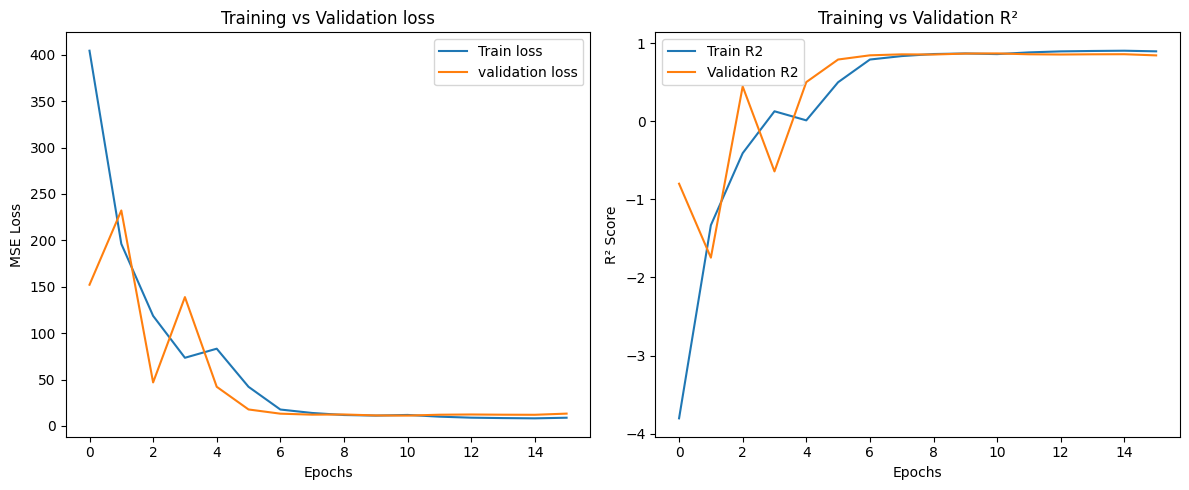

In [32]:
import matplotlib.pyplot as plt 

plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label = 'Train loss')
plt.plot(history.history['val_loss'], label = 'validation loss')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.title("Training vs Validation loss")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['r2_score'], label='Train R2')
plt.plot(history.history['val_r2_score'], label='Validation R2')
plt.xlabel('Epochs')
plt.ylabel('R² Score')
plt.title('Training vs Validation R²')
plt.legend()

plt.tight_layout()
plt.show()

## Question 2: Hyperparameter Tuning
### Perform hyperparameter tuning for the following hyperparameters:
- Number of neurons in each hidden layer.
- activation function in each hidden layer.
- Learning rate of the optimizer.
- Momentum parameter in SGD
 
Report the best set of hyperparameters that improves performance.

In [41]:
import keras_tuner as kt 

def build_model(hp):
    model = Sequential()
    activation = hp.Choice('activation', values = ['relu','sigmoid','tanh'])
    ## input layer 
    model.add(Flatten(input_shape = (13,)))
    ## Tuning the number of neurons in the hidden layer
    units_1 = hp.Int('units_1', min_value = 32, max_value = 512, step = 32)
    model.add(Dense(units_1, activation = activation))
    units_2 = hp.Int('units_2', min_value = 32, max_value = 512, step = 32)
    model.add(Dense(units_2, activation = activation))
    
    ## Output layer for regression 
    model.add(Dense(1, activation = 'linear'))
    
    ## tuning optimizer hyperparameters
    learning_rate = hp.Choice('learning_rate', values = [0.001,0.01,0.005,0.05])
    momentum = hp.Choice('momentum', values = [0.0,0.5,0.8,0.9])
    
    optimizer = SGD(learning_rate=learning_rate, momentum = momentum)
    
    ## compiling the model 
    model.compile(optimizer = optimizer, 
                  loss = 'mse',
                  metrics = [keras.metrics.R2Score(name = 'r2_score')])
    return model

## Defining the tuner 
tuner = kt.RandomSearch(
    build_model, 
    objective = kt.Objective('val_r2_score', direction = 'max'),
    max_trials = 10,
    executions_per_trial = 1, 
    overwrite = True,
    directory = 'tuner_results',
    project_name = 'boston_housing'
)

estop = EarlyStopping(monitor = 'val_loss', patience = 5, min_delta = 1e-5, restore_best_weights=True)

tuner.search(
    x_train_scaled, y_train, 
    epochs = 100,
    validation_split = 0.2, 
    batch_size = 32,
    callbacks = [estop]
)

## Evaluating the best model
best_model = tuner.get_best_models(num_models = 1)[0]
test_loss, test_r2 = best_model.evaluate(x_test_scaled, y_test, verbose=1)

print("Best Hyperparameters:", tuner.get_best_hyperparameters()[0].values)
print("Test Loss:", test_loss)
print("Test R2:", test_r2)

Trial 10 Complete [00h 00m 03s]
val_r2_score: 0.6699258089065552

Best val_r2_score So Far: 0.8757489323616028
Total elapsed time: 00h 00m 49s
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 21.6815 - r2_score: 0.7175 
Best Hyperparameters: {'activation': 'sigmoid', 'units_1': 64, 'units_2': 192, 'learning_rate': 0.005, 'momentum': 0.8}
Test Loss: 26.86515998840332
Test R2: 0.6772713661193848


Epoch 1/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 8.3707 - r2_score: 0.8878 - val_loss: 11.2401 - val_r2_score: 0.8670
Epoch 2/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 11.2104 - r2_score: 0.8672 - val_loss: 14.8029 - val_r2_score: 0.8249
Epoch 3/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 12.0472 - r2_score: 0.8657 - val_loss: 14.7791 - val_r2_score: 0.8251
Epoch 4/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 10.3816 - r2_score: 0.8585 - val_loss: 16.4824 - val_r2_score: 0.8050
Epoch 5/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 8.5413 - r2_score: 0.8910 - val_loss: 18.2147 - val_r2_score: 0.7845
Epoch 6/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 8.2253 - r2_score: 0.9061 - val_loss: 15.0843 - val_r2_score: 0.8215


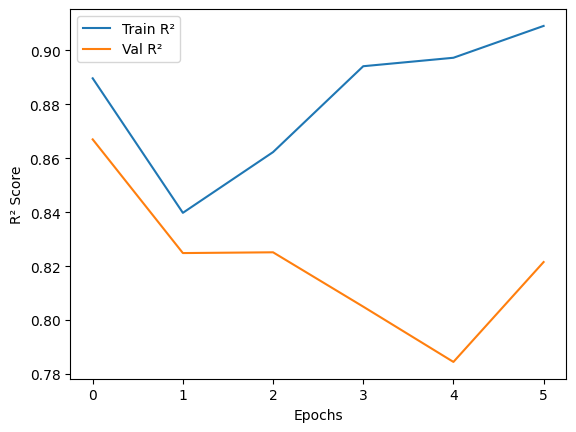

In [42]:
history = model.fit(x_train_scaled, y_train, batch_size = 32,epochs = 1000, verbose = 1 , validation_split = 0.2, callbacks=estop)
plt.plot(history.history['r2_score'], label='Train R²')
plt.plot(history.history['val_r2_score'], label='Val R²')
plt.xlabel('Epochs')
plt.ylabel('R² Score')
plt.legend()
plt.show()

## Question 3: Optimizer Comparison
- Try at least three optimizers (e.g., SGD with momentum, RMSprop, Adam).
- Train the same model architecture with each optimizer.
- Compare their performances (using test MSE).
- Report which optimizer gives the best results.

#### Using the optimal architecture from the prev tuning, here we tune the optimizer

In [46]:
from keras.optimizers import SGD, RMSprop, Adam

def build_model(hp):
    model = Sequential()
    
    # using the best parameters from he prev tuning
    model.add(Dense(64, activation='sigmoid', input_shape=(x_train_scaled.shape[1],)))
    model.add(Dense(192, activation='sigmoid'))
    model.add(Dense(1))  # output layer
    
    # Optimizer choice
    optimizer_choice = hp.Choice('optimizer', ['SGD', 'RMSprop', 'Adam'])
    
    if optimizer_choice == 'SGD':
        optimizer = SGD(
            learning_rate=hp.Choice('lr_sgd', [1e-2, 1e-3, 1e-4]),
            momentum=hp.Choice('momentum', [0.0, 0.8, 0.9])
        )
    elif optimizer_choice == 'RMSprop':
        optimizer = RMSprop(
            learning_rate=hp.Choice('lr_rms', [1e-2, 1e-3, 1e-4])
        )
    else:  
        optimizer = Adam(
            learning_rate=hp.Choice('lr_adam', [1e-2, 1e-3, 1e-4])
        )
    
    model.compile(optimizer=optimizer, loss='mse', metrics=['mse'])
    
    return model

tuner = kt.RandomSearch(
    build_model,
    objective='val_mse',
    max_trials=10,
    executions_per_trial=1,
    overwrite=True,
    directory='optimizer_tuning',
    project_name='boston_housing_opt'
)

# Early stopping to avoid overfitting
estop = EarlyStopping(monitor='val_loss', min_delta = 1e-5, patience=5, restore_best_weights=True)

tuner.search(
    x_train_scaled, y_train,
    epochs=200,
    validation_split=0.2,
    batch_size=32,
    callbacks=[estop],
    verbose=1
)


best_model = tuner.get_best_models(num_models=1)[0]
best_hp = tuner.get_best_hyperparameters(1)[0]

print("Best Optimizer Hyperparameters:", best_hp.values)

history = best_model.fit(
    x_train_scaled, y_train,
    validation_split=0.2,
    epochs=200,
    batch_size=32,
    callbacks=[estop],
    verbose=1
)

test_loss, test_mse = best_model.evaluate(x_test_scaled, y_test, verbose=1)
print(f"Test MSE: {test_mse:.4f}")

from sklearn.metrics import r2_score
y_pred = best_model.predict(x_test_scaled)
test_r2 = r2_score(y_test, y_pred)
print(f"Test R²: {test_r2:.4f}")




Trial 10 Complete [00h 00m 30s]
val_mse: 15.189946174621582

Best val_mse So Far: 9.348682403564453
Total elapsed time: 00h 02m 28s
Best Optimizer Hyperparameters: {'optimizer': 'Adam', 'lr_sgd': 0.001, 'momentum': 0.0, 'lr_adam': 0.01}
Epoch 1/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 9.8192 - mse: 9.8192 - val_loss: 14.4357 - val_mse: 14.4357
Epoch 2/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 8.9413 - mse: 8.9413 - val_loss: 10.3510 - val_mse: 10.3510
Epoch 3/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 9.0794 - mse: 9.0794 - val_loss: 10.2321 - val_mse: 10.2321
Epoch 4/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 8.8217 - mse: 8.8217 - val_loss: 10.0367 - val_mse: 10.0367
Epoch 5/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 11.4740 - mse: 11.4740 - val_loss: 14.4999 - val_mse: 14.4999
Epoch 6/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 8.8971 - mse: 8.8971 - val_loss: 15.1635 - val_mse: 15.1635
Epoch 7/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/

- Best Optimizer Hyperparameters: {'optimizer': 'Adam', 'lr_sgd': 0.001, 'momentum': 0.0, 'lr_adam': 0.01}